In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv(r"D:\ai\projects\Assignment 06 Linear Regression-- Deadline [24-9-2025]\Expanded_data_with_more_features.csv")

In [4]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [7]:
df.drop(columns="Unnamed: 0",inplace=True)

In [8]:
df.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [10]:
df_0=df.copy()

In [13]:
df_0["EthnicGroup"].fillna("unknown",inplace=True)

In [14]:
df_0["ParentEduc"].fillna("unknown",inplace=True)

C:\Users\Ali\AppData\Local\Temp\ipykernel_4088\68392598.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_0["ParentEduc"].fillna("unknown",inplace=True)


In [15]:
df_0["TestPrep"].value_counts()

TestPrep
none         18856
completed     9955
Name: count, dtype: int64

In [17]:
df_0["TestPrep"].fillna("none",inplace=True)

In [18]:
df_0["ParentMaritalStatus"].value_counts()

ParentMaritalStatus
married     16844
single       7097
divorced     4919
widowed       591
Name: count, dtype: int64

In [19]:
df_0["ParentMaritalStatus"].fillna("unknown",inplace=True)

In [20]:
df_0["PracticeSport"].value_counts()

PracticeSport
sometimes    15213
regularly    10793
never         4004
Name: count, dtype: int64

In [21]:
df_0["PracticeSport"].fillna("unknown",inplace=True)

In [22]:
df_0["IsFirstChild"].value_counts()

IsFirstChild
yes    19082
no     10655
Name: count, dtype: int64

In [24]:
df_0["IsFirstChild"].fillna(df_0["IsFirstChild"].mode()[0],inplace=True)

In [25]:
df_0["NrSiblings"].value_counts()

NrSiblings
1.0    8217
2.0    6790
3.0    6123
0.0    3085
4.0    2941
5.0    1320
6.0     302
7.0     291
Name: count, dtype: int64

In [26]:
df["TransportMeans"].value_counts()

TransportMeans
school_bus    16145
private       11362
Name: count, dtype: int64

In [27]:
#?
df_0["TransportMeans"].fillna(df_0["TransportMeans"].mode()[0],inplace=True)

C:\Users\Ali\AppData\Local\Temp\ipykernel_4088\3344726647.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_0["TransportMeans"].fillna(df_0["TransportMeans"].mode()[0],inplace=True)


In [28]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          30641 non-null  object 
 2   ParentEduc           30641 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             30641 non-null  object 
 5   ParentMaritalStatus  30641 non-null  object 
 6   PracticeSport        30641 non-null  object 
 7   IsFirstChild         30641 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       30641 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [29]:
df_0["WklyStudyHours"].fillna(df_0["WklyStudyHours"].mode()[0],inplace=True)

In [31]:
df_0["NrSiblings"].describe()

count    29069.000000
mean         2.145894
std          1.458242
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: NrSiblings, dtype: float64

In [32]:
df_0.dropna(inplace=True)

In [33]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29069 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               29069 non-null  object 
 1   EthnicGroup          29069 non-null  object 
 2   ParentEduc           29069 non-null  object 
 3   LunchType            29069 non-null  object 
 4   TestPrep             29069 non-null  object 
 5   ParentMaritalStatus  29069 non-null  object 
 6   PracticeSport        29069 non-null  object 
 7   IsFirstChild         29069 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       29069 non-null  object 
 10  WklyStudyHours       29069 non-null  object 
 11  MathScore            29069 non-null  int64  
 12  ReadingScore         29069 non-null  int64  
 13  WritingScore         29069 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [40]:
df_1=df_0.copy()

<Axes: >

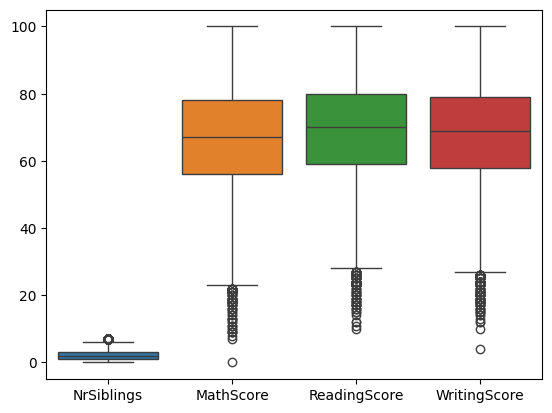

In [46]:
sns.boxplot(df_1)

<Axes: >

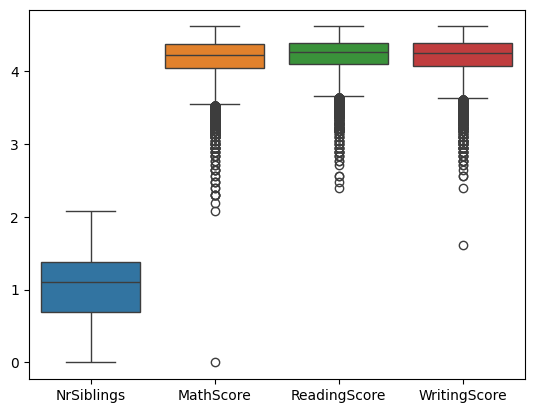

In [109]:
df_11=df_1.copy()
num=["NrSiblings","MathScore","ReadingScore","WritingScore"]
for col in num :
    df_11[col]=np.log1p(df_1[col])
sns.boxplot(df_11)

<Axes: >

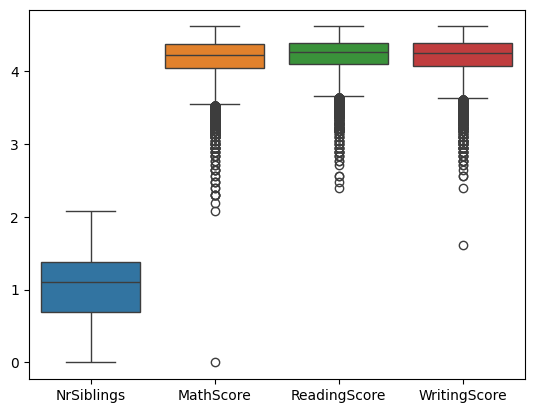

In [43]:
df_12=df_1.copy()
num=["NrSiblings","MathScore","ReadingScore","WritingScore"]
for col in num :
    df_12[col]=np.log1p(df_1[col])
sns.boxplot(df_12)

<Axes: >

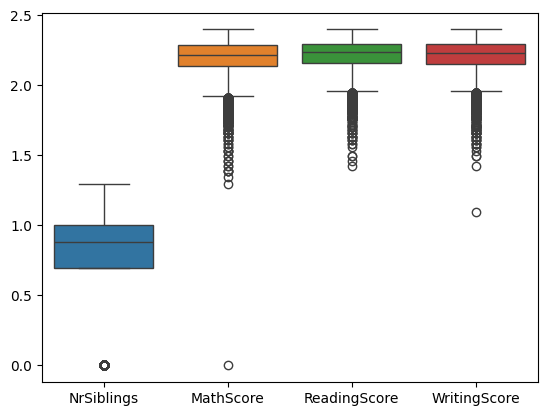

In [45]:
df_13=df_1.copy()
num=["NrSiblings","MathScore","ReadingScore","WritingScore"]
for col in num :
    df_13[col]=np.sqrt(df_1[col])
    df_13[col]=np.log1p(df_13[col])
sns.boxplot(df_13)

In [36]:
df_1.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 29068 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               29068 non-null  object 
 1   EthnicGroup          29068 non-null  object 
 2   ParentEduc           29068 non-null  object 
 3   LunchType            29068 non-null  object 
 4   TestPrep             29068 non-null  object 
 5   ParentMaritalStatus  29068 non-null  object 
 6   PracticeSport        29068 non-null  object 
 7   IsFirstChild         29068 non-null  object 
 8   NrSiblings           29068 non-null  float64
 9   TransportMeans       29068 non-null  object 
 10  WklyStudyHours       29068 non-null  object 
 11  MathScore            29068 non-null  float64
 12  ReadingScore         29068 non-null  float64
 13  WritingScore         29068 non-null  float64
dtypes: float64(4), object(10)
memory usage: 3.3+ MB


<Axes: ylabel='MathScore'>

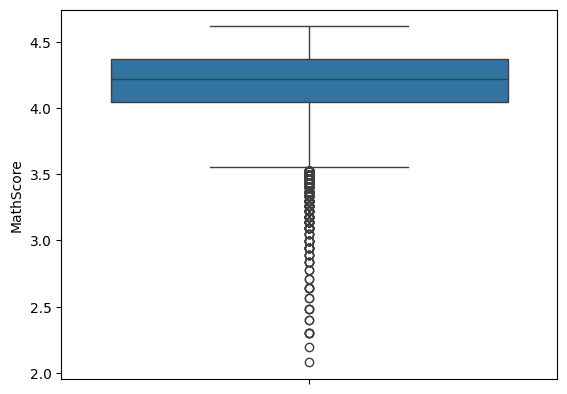

In [110]:
#  remove and transformation 

#  detect  
#  IQR  
df_copy = df_11.copy()
Feature="MathScore"
Q1 = df_copy[Feature].quantile(0.25)
Q3 = df_copy[Feature].quantile(0.75)
IQR  = Q3 - Q1

mask_outliers  =  ((df_copy[Feature] <  Q1 - 12*IQR)|( df_copy[Feature] > Q3 + 12*IQR))

df_copy= df_copy[~mask_outliers]
df_copy.info()
sns.boxplot(df_copy[Feature])

In [111]:
df_11=df_copy.copy()
df_11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29068 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               29068 non-null  object 
 1   EthnicGroup          29068 non-null  object 
 2   ParentEduc           29068 non-null  object 
 3   LunchType            29068 non-null  object 
 4   TestPrep             29068 non-null  object 
 5   ParentMaritalStatus  29068 non-null  object 
 6   PracticeSport        29068 non-null  object 
 7   IsFirstChild         29068 non-null  object 
 8   NrSiblings           29068 non-null  float64
 9   TransportMeans       29068 non-null  object 
 10  WklyStudyHours       29068 non-null  object 
 11  MathScore            29068 non-null  float64
 12  ReadingScore         29068 non-null  float64
 13  WritingScore         29068 non-null  float64
dtypes: float64(4), object(10)
memory usage: 3.3+ MB


<class 'pandas.core.frame.DataFrame'>
Index: 29067 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               29067 non-null  object 
 1   EthnicGroup          29067 non-null  object 
 2   ParentEduc           29067 non-null  object 
 3   LunchType            29067 non-null  object 
 4   TestPrep             29067 non-null  object 
 5   ParentMaritalStatus  29067 non-null  object 
 6   PracticeSport        29067 non-null  object 
 7   IsFirstChild         29067 non-null  object 
 8   NrSiblings           29067 non-null  float64
 9   TransportMeans       29067 non-null  object 
 10  WklyStudyHours       29067 non-null  object 
 11  MathScore            29067 non-null  float64
 12  ReadingScore         29067 non-null  float64
 13  WritingScore         29067 non-null  float64
dtypes: float64(4), object(10)
memory usage: 3.3+ MB


<Axes: ylabel='WritingScore'>

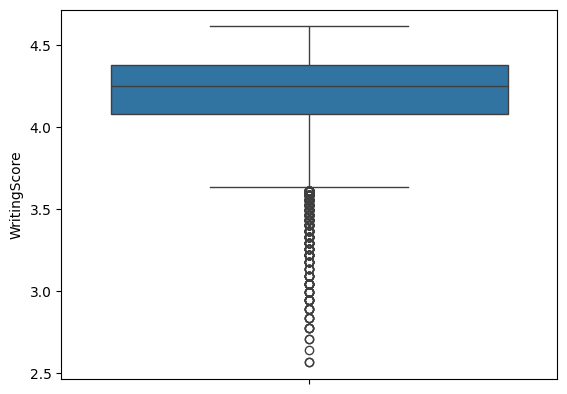

In [112]:
#  remove and transformation 

#  detect  
#  IQR  
df_copy = df_11.copy()
Feature="WritingScore"
Q1 = df_copy[Feature].quantile(0.25)
Q3 = df_copy[Feature].quantile(0.75)
IQR  = Q3 - Q1

mask_outliers  =  ((df_copy[Feature] <  Q1 - 8*IQR)|( df_copy[Feature] > Q3 + 15*IQR))

df_copy= df_copy[~mask_outliers]
df_copy.info()
sns.boxplot(df_copy[Feature])

In [113]:
df_11=df_copy.copy()

In [114]:
df_11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29067 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               29067 non-null  object 
 1   EthnicGroup          29067 non-null  object 
 2   ParentEduc           29067 non-null  object 
 3   LunchType            29067 non-null  object 
 4   TestPrep             29067 non-null  object 
 5   ParentMaritalStatus  29067 non-null  object 
 6   PracticeSport        29067 non-null  object 
 7   IsFirstChild         29067 non-null  object 
 8   NrSiblings           29067 non-null  float64
 9   TransportMeans       29067 non-null  object 
 10  WklyStudyHours       29067 non-null  object 
 11  MathScore            29067 non-null  float64
 12  ReadingScore         29067 non-null  float64
 13  WritingScore         29067 non-null  float64
dtypes: float64(4), object(10)
memory usage: 3.3+ MB


In [ ]:
df_11.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,unknown,bachelor's degree,standard,none,married,regularly,yes,1.386294,school_bus,< 5,4.276666,4.276666,4.317488
1,female,group C,some college,standard,none,married,sometimes,yes,0.000000,school_bus,5 - 10,4.248495,4.510860,4.488636
2,female,group B,master's degree,standard,none,single,sometimes,yes,1.609438,school_bus,< 5,4.477337,4.543295,4.521789
3,male,group A,associate's degree,free/reduced,none,married,never,no,0.693147,school_bus,5 - 10,3.828641,4.043051,3.761200
4,male,group C,some college,standard,none,married,sometimes,yes,0.000000,school_bus,5 - 10,4.343805,4.369448,4.330733


In [116]:
df_2=df_11.copy()

In [117]:
df_2.reset_index(inplace=True)

In [118]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29067 entries, 0 to 29066
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                29067 non-null  int64  
 1   Gender               29067 non-null  object 
 2   EthnicGroup          29067 non-null  object 
 3   ParentEduc           29067 non-null  object 
 4   LunchType            29067 non-null  object 
 5   TestPrep             29067 non-null  object 
 6   ParentMaritalStatus  29067 non-null  object 
 7   PracticeSport        29067 non-null  object 
 8   IsFirstChild         29067 non-null  object 
 9   NrSiblings           29067 non-null  float64
 10  TransportMeans       29067 non-null  object 
 11  WklyStudyHours       29067 non-null  object 
 12  MathScore            29067 non-null  float64
 13  ReadingScore         29067 non-null  float64
 14  WritingScore         29067 non-null  float64
dtypes: float64(4), int64(1), object(10)


In [120]:
df_2.drop(columns="index",inplace=True)

In [121]:
df_2.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,unknown,bachelor's degree,standard,none,married,regularly,yes,1.386294,school_bus,< 5,4.276666,4.276666,4.317488
1,female,group C,some college,standard,none,married,sometimes,yes,0.000000,school_bus,5 - 10,4.248495,4.510860,4.488636
2,female,group B,master's degree,standard,none,single,sometimes,yes,1.609438,school_bus,< 5,4.477337,4.543295,4.521789
3,male,group A,associate's degree,free/reduced,none,married,never,no,0.693147,school_bus,5 - 10,3.828641,4.043051,3.761200
4,male,group C,some college,standard,none,married,sometimes,yes,0.000000,school_bus,5 - 10,4.343805,4.369448,4.330733


In [122]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29067 entries, 0 to 29066
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               29067 non-null  object 
 1   EthnicGroup          29067 non-null  object 
 2   ParentEduc           29067 non-null  object 
 3   LunchType            29067 non-null  object 
 4   TestPrep             29067 non-null  object 
 5   ParentMaritalStatus  29067 non-null  object 
 6   PracticeSport        29067 non-null  object 
 7   IsFirstChild         29067 non-null  object 
 8   NrSiblings           29067 non-null  float64
 9   TransportMeans       29067 non-null  object 
 10  WklyStudyHours       29067 non-null  object 
 11  MathScore            29067 non-null  float64
 12  ReadingScore         29067 non-null  float64
 13  WritingScore         29067 non-null  float64
dtypes: float64(4), object(10)
memory usage: 3.1+ MB


In [123]:
df_2.to_csv("df_2.csv")

In [35]:
df_2=pd.read_csv("df_2.csv")

In [36]:
df_2["ParentMaritalStatus"].value_counts()

ParentMaritalStatus
married     15973
single       6724
divorced     4677
unknown      1131
widowed       562
Name: count, dtype: int64

In [37]:
binary_data =["TestPrep","LunchType","IsFirstChild","TransportMeans","Gender"]
nominal_data=["EthnicGroup","ParentEduc","ParentMaritalStatus","PracticeSport","WklyStudyHours"]

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col  in binary_data :
    df_2[col] =encoder.fit_transform(df_2[col])

In [39]:
for col  in nominal_data :
    x=df_2[col].value_counts()
    print(x)

EthnicGroup
group C    8762
group D    7106
group B    5545
group E    3820
group A    2096
unknown    1738
Name: count, dtype: int64
ParentEduc
some college          6313
high school           5387
associate's degree    5262
some high school      5215
bachelor's degree     3213
master's degree       1927
unknown               1750
Name: count, dtype: int64
ParentMaritalStatus
married     15973
single       6724
divorced     4677
unknown      1131
widowed       562
Name: count, dtype: int64
PracticeSport
sometimes    14398
regularly    10266
never         3807
unknown        596
Name: count, dtype: int64
WklyStudyHours
5 - 10    16327
< 5        7834
> 10       4906
Name: count, dtype: int64


In [40]:
df_2.head()


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,0,unknown,bachelor's degree,1,1,married,regularly,1,1.386294,1,< 5,4.276666,4.276666,4.317488
1,1,0,group C,some college,1,1,married,sometimes,1,0.000000,1,5 - 10,4.248495,4.510860,4.488636
2,2,0,group B,master's degree,1,1,single,sometimes,1,1.609438,1,< 5,4.477337,4.543295,4.521789
3,3,1,group A,associate's degree,0,1,married,never,0,0.693147,1,5 - 10,3.828641,4.043051,3.761200
4,4,1,group C,some college,1,1,married,sometimes,1,0.000000,1,5 - 10,4.343805,4.369448,4.330733


In [41]:
import category_encoders as ce
encoder=ce.BinaryEncoder(nominal_data)
df_2_encoded =encoder.fit_transform(df_2)

In [42]:
df_2_encoded.head()

,Unnamed: 0,Gender,EthnicGroup_0,EthnicGroup_1,EthnicGroup_2,ParentEduc_0,ParentEduc_1,ParentEduc_2,LunchType,TestPrep,...,PracticeSport_1,PracticeSport_2,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours_0,WklyStudyHours_1,MathScore,ReadingScore,WritingScore
0,0,0,0,0,1,0,0,1,1,1,...,0,1,1,1.386294,1,0,1,4.276666,4.276666,4.317488
1,1,0,0,1,0,0,1,0,1,1,...,1,0,1,0.000000,1,1,0,4.248495,4.510860,4.488636
2,2,0,0,1,1,0,1,1,1,1,...,1,0,1,1.609438,1,0,1,4.477337,4.543295,4.521789
3,3,1,1,0,0,1,0,0,0,1,...,1,1,0,0.693147,1,1,0,3.828641,4.043051,3.761200
4,4,1,0,1,0,0,1,0,1,1,...,1,0,1,0.000000,1,1,0,4.343805,4.369448,4.330733


In [43]:
df_2_encoded.drop(columns="Unnamed: 0",inplace=True)

In [44]:
df_2_encoded.head()

,Gender,EthnicGroup_0,EthnicGroup_1,EthnicGroup_2,ParentEduc_0,ParentEduc_1,ParentEduc_2,LunchType,TestPrep,ParentMaritalStatus_0,...,PracticeSport_1,PracticeSport_2,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours_0,WklyStudyHours_1,MathScore,ReadingScore,WritingScore
0,0,0,0,1,0,0,1,1,1,0,...,0,1,1,1.386294,1,0,1,4.276666,4.276666,4.317488
1,0,0,1,0,0,1,0,1,1,0,...,1,0,1,0.000000,1,1,0,4.248495,4.510860,4.488636
2,0,0,1,1,0,1,1,1,1,0,...,1,0,1,1.609438,1,0,1,4.477337,4.543295,4.521789
3,1,1,0,0,1,0,0,0,1,0,...,1,1,0,0.693147,1,1,0,3.828641,4.043051,3.761200
4,1,0,1,0,0,1,0,1,1,0,...,1,0,1,0.000000,1,1,0,4.343805,4.369448,4.330733


In [45]:
df_2_encoded.to_csv("df_2_encoded.csv")